In [ ]:
%matplotlib inline
from matplotlib.pyplot import plot, show, figure, title
import matplotlib as plt
import numpy as np

from scipy.fftpack import dct, idct
from scipy.sparse import coo_matrix

In [ ]:
!pip2 install matplotlib

In [ ]:
Fs = 40e3  #Sample rate

#path of the audio file
audio_data = 'a1.wav'
duration = 1./8
N_samps = np.floor(duration*Fs)
M = 250   # Number of compressed "basis" functions - we're going from N_samps to M samps.
f1 = 200
f2 = 3950

print "Compression ratio {0}".format(M/N_samps)
t = np.linspace(0,duration,N_samps)

Compression ratio 0.05


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0,0.5,'X(t)')

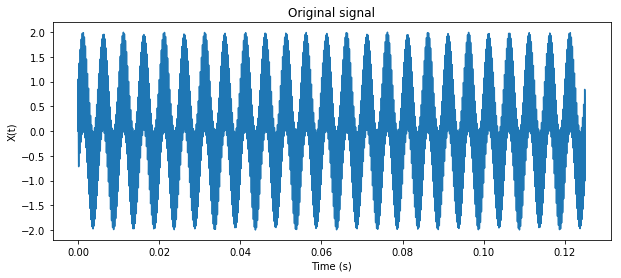

In [ ]:
X = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

figure(figsize=[10,4])
plot(t,X)
title('Original signal')
plt.pyplot.xlabel('Time (s)')
plt.pyplot.ylabel('X(t)')

In [ ]:
yi = np.random.randint(0,N_samps,(M,))
yi = np.sort(yi)
Y = X[yi]

Text(0,0.5,'X(t) and X(random sample)')

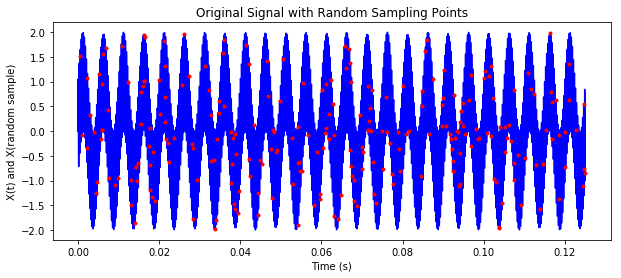

In [ ]:
figure(figsize=[10,4])
plot(t,X,'b',t[yi],Y,'r.')
title('Original Signal with Random Sampling Points')
plt.pyplot.xlabel('Time (s)')
plt.pyplot.ylabel('X(t) and X(random sample)')

In [ ]:
# print(N_samps)
D = dct(np.eye(int(N_samps)))   # Construct the DCT basis functions for each of the frequencies
A = D[yi]                  # Downsample based on our random sampling

In [ ]:
np.shape(A)

(250, 5000)

In [ ]:
from sklearn.linear_model import Lasso   # http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


Solution is %96.0 sparse


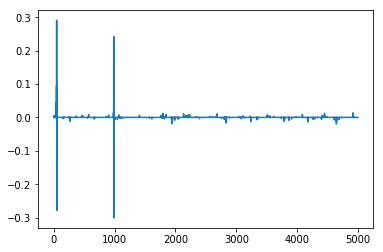

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(A,Y)

plot(lasso.coef_)

sparseness = np.sum(lasso.coef_ == 0)/N_samps
print "Solution is %{0} sparse".format(100.*sparseness)

In [ ]:
Xhat = idct(lasso.coef_)


Text(0.5,1,'Error delta')

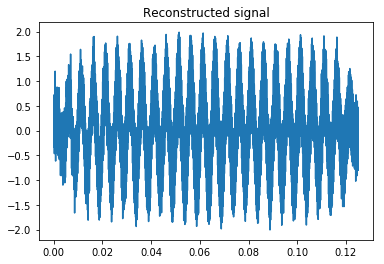

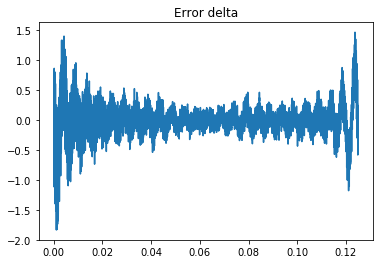

In [ ]:
figure()
plot(t,Xhat)
title('Reconstructed signal')
figure()
plot(t,Xhat-X)
title('Error delta')

Text(0.5,1,'Original and reconstructed signal plotted together (green is orig)')

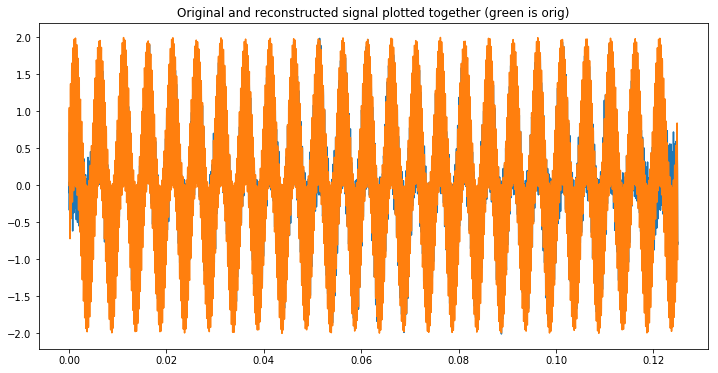

In [ ]:
figure(figsize=[12,6])
plot(t,Xhat)
plot(t,X)
title("Original and reconstructed signal plotted together (green is orig)")

In [ ]:
print "Signal is reconstructed using only %{0} of the data!".format(100.*M/N_samps)


Signal is reconstructed using only %5.0 of the data!


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Power (dB)')

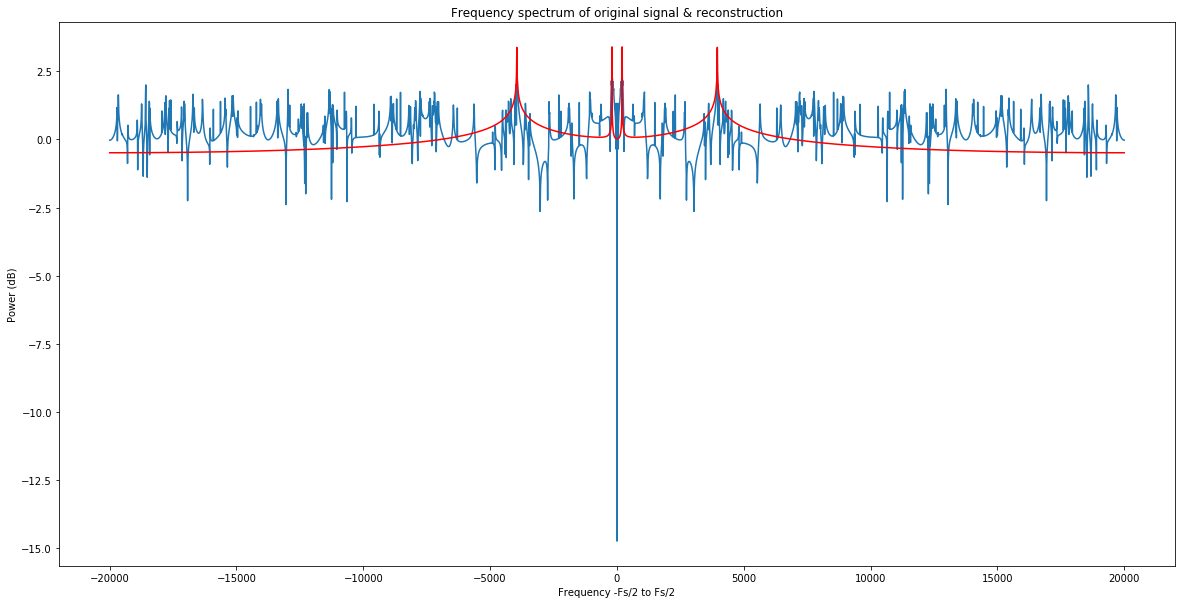

In [ ]:
from numpy.fft import *

f = np.linspace(-Fs/2,Fs/2,N_samps)
figure(figsize=[20,10])
plot(f,np.log10(np.fft.fftshift(np.abs(fft(Xhat)))))
title("Frequency spectrum of original signal & reconstruction")
plot(f,np.log10(np.fft.fftshift(np.abs(fft(X)))),'r')
plt.pyplot.xlabel('Frequency -Fs/2 to Fs/2')
plt.pyplot.ylabel('Power (dB)')